/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading model across multiple GPUs...


/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 4/4 [00:07<00:00,  1.90s/it]


Model loaded successfully.
Extracting hidden states for non-infringement texts...


Processing data batches: 100%|██████████| 208/208 [00:37<00:00,  5.59it/s]


Extracting hidden states for infringement texts...


Processing data batches: 100%|██████████| 186/186 [00:34<00:00,  5.32it/s]


Data successfully split into training and test sets.


Training Epochs:   0%|          | 1/250 [00:00<00:37,  6.58it/s]

Epoch 10/250, Loss: 0.6742


Training Epochs:   4%|▍         | 10/250 [00:00<00:06, 35.04it/s]

Test Accuracy: 54.11%, F1-score: 0.6973
New best model saved with Accuracy 54.11%.
New best model saved with F1-score 0.6973.
Epoch 20/250, Loss: 0.6490
Test Accuracy: 60.76%, F1-score: 0.7156


Training Epochs:   8%|▊         | 20/250 [00:00<00:06, 35.91it/s]

New best model saved with Accuracy 60.76%.
New best model saved with F1-score 0.7156.
Epoch 30/250, Loss: 0.5932
Test Accuracy: 64.24%, F1-score: 0.7210


Training Epochs:  16%|█▌        | 40/250 [00:00<00:03, 53.47it/s]

New best model saved with Accuracy 64.24%.
New best model saved with F1-score 0.7210.
Epoch 40/250, Loss: 0.4905
Test Accuracy: 70.89%, F1-score: 0.7341
New best model saved with Accuracy 70.89%.
New best model saved with F1-score 0.7341.
Epoch 50/250, Loss: 0.3904
Test Accuracy: 71.52%, F1-score: 0.7039
New best model saved with Accuracy 71.52%.


Training Epochs:  40%|████      | 100/250 [00:01<00:01, 147.75it/s]

Epoch 60/250, Loss: 0.3259
Test Accuracy: 72.78%, F1-score: 0.7190
New best model saved with Accuracy 72.78%.
Epoch 70/250, Loss: 0.2872
Test Accuracy: 73.73%, F1-score: 0.7243
New best model saved with Accuracy 73.73%.
Epoch 80/250, Loss: 0.2690
Test Accuracy: 74.05%, F1-score: 0.7285
New best model saved with Accuracy 74.05%.
Epoch 90/250, Loss: 0.2580
Test Accuracy: 74.68%, F1-score: 0.7315
New best model saved with Accuracy 74.68%.
Epoch 100/250, Loss: 0.2511
Test Accuracy: 75.63%, F1-score: 0.7390
New best model saved with Accuracy 75.63%.
New best model saved with F1-score 0.7390.
Epoch 110/250, Loss: 0.2453
Test Accuracy: 75.00%, F1-score: 0.7340


Training Epochs:  76%|███████▌  | 190/250 [00:01<00:00, 281.15it/s]

Epoch 120/250, Loss: 0.2473
Test Accuracy: 73.73%, F1-score: 0.7067
Epoch 130/250, Loss: 0.2377
Test Accuracy: 74.68%, F1-score: 0.7279
Epoch 140/250, Loss: 0.2354
Test Accuracy: 75.00%, F1-score: 0.7322
Epoch 150/250, Loss: 0.2321
Test Accuracy: 74.37%, F1-score: 0.7216
Epoch 160/250, Loss: 0.2286
Test Accuracy: 74.37%, F1-score: 0.7216
Epoch 170/250, Loss: 0.2286
Test Accuracy: 75.00%, F1-score: 0.7358
Epoch 180/250, Loss: 0.2240
Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 190/250, Loss: 0.2203
Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 200/250, Loss: 0.2173
Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 210/250, Loss: 0.2176


Training Epochs: 100%|██████████| 250/250 [00:01<00:00, 172.68it/s]


Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 220/250, Loss: 0.2130
Test Accuracy: 74.37%, F1-score: 0.7216
Epoch 230/250, Loss: 0.2088
Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 240/250, Loss: 0.2059
Test Accuracy: 74.05%, F1-score: 0.7172
Epoch 250/250, Loss: 0.2085
Test Accuracy: 73.42%, F1-score: 0.7021


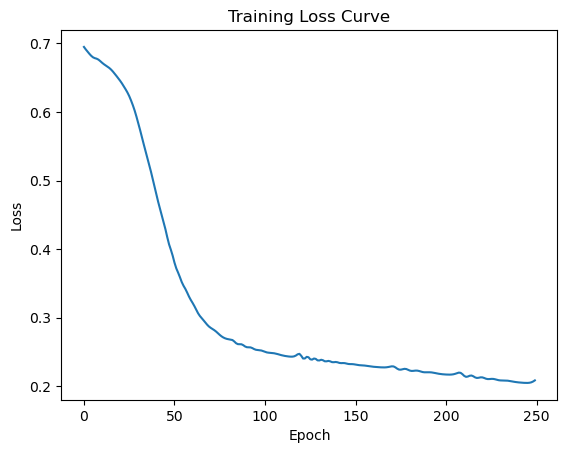

Training complete. Best Accuracy: 75.63%, Best F1-score: 0.7390


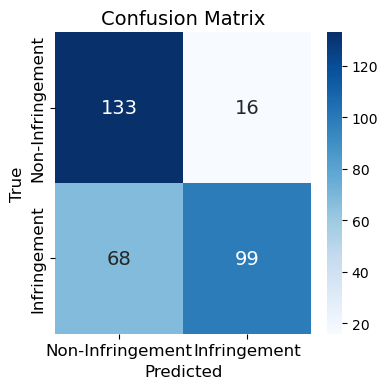

: 

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel
import json
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5,6,7"

model_name ='meta-llama/Llama-3.1-8B'
non_infringement_file = 'extra_30_8B.infringement.json'
infringement_file = 'extra_30_8B.non_infringement.json'
checkpoint_file = ''

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))  
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=["Non-Infringement", "Infringement"], 
                yticklabels=["Non-Infringement", "Infringement"],
                annot_kws={"size": 14})
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12) 
    plt.title('Confusion Matrix', fontsize=14)  
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12)  
    plt.tight_layout() 
    plt.show()

class CustomMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CustomMLP, self).__init__()
        self.down = nn.Linear(input_dim, hidden_dim)
        self.gate = nn.Linear(input_dim, hidden_dim)
        self.up = nn.Linear(hidden_dim, 1)
        self.activation = nn.SiLU()

    def forward(self, x):
        down_output = self.down(x)
        gate_output = self.gate(x)
        gated_output = down_output * self.activation(gate_output)
        return self.up(gated_output)

def load_data(non_infringement_file, infringement_file):
    with open(non_infringement_file, 'r', encoding='utf-8') as file:
        non_infringement_data = json.load(file)
    non_infringement_outputs = [entry['input'] for entry in non_infringement_data]
    y_non_infringement = [1] * len(non_infringement_outputs)

    with open(infringement_file, 'r', encoding='utf-8') as file:
        infringement_data = json.load(file)
    infringement_outputs = [entry['input'] for entry in infringement_data]
    y_infringement = [0] * len(infringement_outputs)

    return non_infringement_outputs, y_non_infringement, infringement_outputs, y_infringement

def extract_hidden_states(texts, model, tokenizer, batch_size=4):
    hidden_states = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing data batches"):
        batch_texts = texts[i:i + batch_size]
        
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: val.to("cuda") for key, val in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        last_layer_hidden_states = outputs.hidden_states[2]
        last_token_hidden_states = last_layer_hidden_states.mean(dim=1).cpu().numpy() 
        hidden_states.append(last_token_hidden_states)
    return np.vstack(hidden_states)

def load_large_model(model_name):
    print("Loading model across multiple GPUs...")
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="balanced", 
        offload_folder="offload",
        offload_state_dict=True,
        output_hidden_states=True
    )
    print("Model loaded successfully.")
    return model

def train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim, epochs=250, lr=0.001, checkpoint_path=checkpoint_file):
    custom_mlp = CustomMLP(input_dim, hidden_dim).to("cuda")
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(custom_mlp.parameters(), lr=lr)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to("cuda")
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to("cuda")

    best_f1 = -float('inf')
    best_accuracy = -float('inf') 
    losses = []

    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        custom_mlp.train()
        optimizer.zero_grad()
        outputs = custom_mlp(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
            custom_mlp.eval()
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to("cuda")
            with torch.no_grad():
                y_pred_logits = custom_mlp(X_test_tensor)
                y_pred = (torch.sigmoid(y_pred_logits) > 0.5).float().cpu().numpy()

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(f"Test Accuracy: {accuracy * 100:.2f}%, F1-score: {f1:.4f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                torch.save(custom_mlp.state_dict(), checkpoint_path)
                print(f"New best model saved with Accuracy {best_accuracy * 100:.2f}%.")

            if f1 > best_f1:
                best_f1 = f1
                torch.save(custom_mlp.state_dict(), checkpoint_path) 
                print(f"New best model saved with F1-score {best_f1:.4f}.")

    plt.plot(losses)
    plt.title("Training Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    return custom_mlp, best_accuracy, best_f1

tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
model = load_large_model(model_name)
tokenizer.pad_token = tokenizer.eos_token

non_infringement_outputs, y_non_infringement, infringement_outputs, y_infringement = load_data(non_infringement_file, infringement_file)

print("Extracting hidden states for non-infringement texts...")
X_non_infringement = extract_hidden_states(non_infringement_outputs, model, tokenizer)

print("Extracting hidden states for infringement texts...")
X_infringement = extract_hidden_states(infringement_outputs, model, tokenizer)

split_index_non_infringement = int(0.8 * len(X_non_infringement))
split_index_infringement = int(0.8 * len(X_infringement))

X_train = np.vstack((X_non_infringement[:split_index_non_infringement], X_infringement[:split_index_infringement]))
X_test = np.vstack((X_non_infringement[split_index_non_infringement:], X_infringement[split_index_infringement:]))
y_train = np.concatenate((y_non_infringement[:split_index_non_infringement], y_infringement[:split_index_infringement]))
y_test = np.concatenate((y_non_infringement[split_index_non_infringement:], y_infringement[split_index_infringement:]))

print("Data successfully split into training and test sets.")

input_dim = X_train.shape[1]
# print(input_dim)
hidden_dim = 256

trained_model, best_accuracy, best_f1 = train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim)
print(f"Training complete. Best Accuracy: {best_accuracy * 100:.2f}%, Best F1-score: {best_f1:.4f}")

trained_model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to("cuda")
with torch.no_grad():
    y_pred_logits = trained_model(X_test_tensor)
    y_pred = (torch.sigmoid(y_pred_logits) > 0.5).float().cpu().numpy()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# 1. Load the best model (the one saved with the best accuracy)
# trained_model.load_state_dict(torch.load(checkpoint_path))
# trained_model.eval()

# # 2. Generate predictions on the test set using the best model
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to("cuda")
# with torch.no_grad():
#     y_pred_logits = trained_model(X_test_tensor)
#     y_pred = (torch.sigmoid(y_pred_logits) > 0.5).float().cpu().numpy()

# # 3. Plot the confusion matrix for the best model's predictions
# plot_confusion_matrix(y_test, y_pred)